# readDiag

O pacote `readDiag` foi concebido para ser uma ferramenta que possibilita o fácil acesso aos arquivos diagnósticos gerados pelo [Gridpoint Statistical Interpolation (GSI) system](https://github.com/NOAA-EMC/GSI). O pacote é composto principalmente por 2 classes, a primeira para ler os dados (`read_diag`) e outra para fazer diferentes tipos de figuras com dados selecionados (`plot_diag`).

## A Classe `read_diag`

A classe read_diag é composta por 5 funções:

1. `__init__(self, diagFile, diagFileAnl=None, isisList=None, zlevs=None)`: sendo `diagFile` o arquivo de diagnóstico do primeiro outer loop com informação do OmF e `diagFileAnl` do último outer loop com informação do OmA. Note que não é necessário informar os dois arquivos, o `diagFileAnl` é opcional. Neste caso, a informação lida (Omf ou OmA) dependerá do outer loop (arquivo diagnóstico) fornecido;
2. `overview(self)`: esta função cria e retorna um dicionário com as informações existentes no arquivo;
3. `pfileinfo(self)`: esta função imprime de forma elegante uma lista com as informações existentes no arquivo;
4. `close(self)`: esta função fecha o último arquivo aberto;
5. `tocsv(self, varName=None, varType=None, dateIni=None, dateFin=None, nHour="06", Level=None, Lay=None, SingleL=None)`: esta função gera um arquivo CSV dos parâmetros OmF e OmA com as seguintes informações: data, média, desvio-padrão e total de dados para a variável e tipo escolhidos.
    
Os dados de entrada da função e funcionalidades são idênticas àquelas da função `time_series` que é apresentada na próxima seção na classe `plot_diag` (item 7 - ver também detalhes das funcionalidades [aqui](#time_series)). O que distingue as duas funções é que esta escreve um arquivo CSV e a outra gera figuras de séries temporais.

## A Classe `plot_diag`
    
A classe plot_diag é composta por 7 funções:

1. `plot(self, varName, varType, param, mask=None, **kwargs)`: a função `plot` gera uma figura para a variável `varName` (ex: `uv`), `varType` (ex: `220` (dropssonda)) e `param`, que pode ser várias opções como: `param="obs"` para o valor da observação, `param="omf"` para observação menos background ou `param="oma"` para observação menos análise. Também é possível mascarar os dados com a variável `iuse`, que indica se o dado foi (`iuse=1`) ou não (`iuse=-1` - dado monitorado) utilizado na assimilação. Abaixo há um exemplo executado para `varName="uv"`, `varType=220`, `param="obs"` e mask `iuse==1"`;

<img src=notefigs/uv_obs_plot.png style="width: 800px;">
<br>
    
2. `ptmap(self, varName, varType=None, mask=None, **kwargs)`: a função `ptmap` gera uma figura com a localização de todas as observações definidas por `varName` (ex: `uv`) e `varType` (pode ser um único tipo ou uma lista, ex: `[200]` ou `[220,221,257]`. Se `varType` não for informado, então todos os tipos serão incluídos na figura. Também é possível mascarar os dados com a variável `iuse`, que indica se o dado foi (`iuse=1`) ou não (`iuse=-1` - dado monitorado) utilizado na assimilação. Abaixo há um exemplo executado para `varName="uv"`, `varType=[254,242,221,220,257,258,281,280]` e `mask=None`; 

<img src=notefigs/uv_254_242_221_220_257_258_281_280_ptmap.png style="width: 800px;">
<br>

3. `pvmap(self, varName=None, mask=None, **kwargs)`: a função `pvmap` é similar à função `ptmap`, com a diferença de não especificar o tipo (`varType`), podendo então escolher uma lista de variáveis, ex: `["uv","ps","t"]`. Abaixo há um exemplo executado para `varName=['uv','ps','t']`, e `mask=None`; 

<img src=notefigs/uv_ps_t_pvmap.png style="width: 800px;">
<br>

4. `pcount(self,varName,**kwargs)`: a função `pcount` gera um histograma da quantidade de dados para uma determinada variável `varName` (ex: `uv`) e todos os tipos disponíveis (`varType`);

<img src=notefigs/uv_pcount.png style="width: 800px;">
<br>

5. `kxcount(self,**kwargs)`: a função `kxcount` é similar à `pcount`, porém não especifica a variável (`varName`). Esta função gera um histograma com o total de dados (todas as variáveis somadas) para todos os tipos disponíveis (`varType`);

<img src=notefigs/kxcount.png style="width: 800px;">
<br>

6. `vcount(self,**kwargs)`: a função `vcount` gera um histograma com a quantidade total de dados para cada variável (`ps`, `t`, `q`, `uv`);

<img src=notefigs/vcount.png style="width: 800px;">
<br>

7. `time_series(self, varName=None, varType=None, dateIni=None, dateFin=None, nHour="06", vminOMA=None, vmaxOMA=None, vminSTD=0.0, vmaxSTD=14.0, Level=None, Lay=None, SingleL=None, Clean=None)`: a função `time_series` pode gerar 6 tipos distintos de figuras, dependendo da configuração especificada na sua chamada. A característica comum entre os 6 tipos é a variação no tempo, enquanto que a diferença entre os 6 tipos é a forma de tratar os níveis verticais. Basicamente estas formas são distribuídas entre variar na vertical (diferentes valores para diferentes níveis/camadas) e fixo na vertical (nível específico, média na camada ou toda a atmosfera). 

A seguir são apresentados os parâmetros de entrada na função e cada uma das opções de figuras será explicada em mais detalhes.
    
| Parâmetro       | Exemplo                                  | Descrição
| :---            | :---:                                    | :---
| `self`          | `['/home/user/diag_conv_01.2019121000']` | Lista com todos os caminhos completos (`caminho/nome_do_arquivo`) de cada tempo da série temporal.             
| `varName`       | `uv`                                     | Nome da variável   
| `varType`       | `220`                                    | Tipo da variável
| `dateIni`       | `2019121000`                             | Data inicial da série temporal
| `dateFin`       | `2019121118`                             | Data final da série temporal
| `nHour`         | `6`                                      | Intervalo de tempo em horas entre cada arquivo na lista `self`
| `vminOMA`       | `-2.0`                                   | Valor mínimo da escala y (ordenada) para OmF e OmA
| `vmaxOMA`       | `2.0`                                    | Valor máximo da escala y (ordenada) para OmF e OmA
| `vminSTD`       | `0.0`                                    | Valor mínimo da escala y (ordenada) para o desvio-padrão
| `vmaxSTD`       | `14.0`                                   | Valor máximo da escala y (ordenada) para o desvio-padrão
| `Level`         | `Zlevs`                                  | Valor do nível a ser feita a série temporal, opções: valor numérico referente ao nível, ex.: 1000 p/ 1000 hPa; `Zlevs` para plotar por camadas (em torno dos níveis padrão); `None` para plotar de todos os níveis.
| `Lay`           | 25                                       | Metade do tamanho da camada (se `Level="Zlevs"`) em hPa se optar por amostragem em camadas. Se `Lay=None`, `Lay` será calculada internamente para preencher toda a atmosfera contendo os níveis padrão.
| `SingleL`       | `All`                                    | Quando `Level` for fixo, ex: 1000 hPa, será considerado exatamente esse nível (usando a opção `SingleL=None`) ou em todos os níveis como uma única camada (usando `SingleL="All"`) ou em uma camada definida em torno do valor de `Level` variando entre `Level-Lay` e `Level+Lay`. Se `Lay` não for informado, será usado um valor padrão de 50 hPa.
| `Clean`         | `True` ou `False`                        | Se `True`, após gerar e salvar a figura, a janela da figura é reiniciada (`plt.clf()`) ou fechada (`plt.close()`), se `False`, este procedimento é eliminado e a figura continua disponível para visualização com `plt.show()`.

Todas as figuras geradas com a opção `Level` igual a `None` ou `Zlevs` conterá no nome o termo `all_levels`, caso contrário será `level` ou `layer`, dependendo da opção `SingleL`.

No decorrer deste notebook são mostrados exemplos com recortes de código para exemplificar o uso das funções acima elencadas.

## Utilização da classe `read_diag`

### Bibliotecas necessárias

Para iniciar a utilização do `readDiag`, carregue primeiro as bibliotecas necessárias para a sua utilização:

* `gsidiag`: é a biblioteca que contém as classes `read_diag` e `plot_diag`;
* `pandas`: é a biblioteca que fornece as estruturas de dados tabulados utilizadas pelo `readDiag`;
* `matplotlib`: é a biblioteca a partir da qual são confeccionadas as figuras;
* `datetime`: é a biblioteca utilizada para manipular datas.

A instrução `%matplotlib inline` é um comando mágico do Jupyter e apenas ajusta o ambiente para que não seja necessário utilizar o comando `plt.show()` sempre que figuras forem mostradas dentro do notebook. Se você estiver utilizando o `readDiag` dentro de um script Python, esta diretiva pode ser suprimida e o comando `plt.show()` deve ser utilizado, a depender da situação.

In [1]:
import gsidiag as gd

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

%matplotlib inline

### Variáveis principais

Na tabela a seguir, estão relacionadas os valores padrão das variáveis utilizadas ao longo deste tutorial. Observe que as variáveis possuem diferentes tipos e que algumas podem ser declaradas como `None`.

| Variáveis |     | Valores          | Tipo              |
| :---:     |:---:| :---             | :---              |
| `DIRdiag` | =   | `/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout` | string |
|`varName`  | =   | `uv`             | string            |  
|`varType`  | =   | `220`            | integer           |        
|`dateIni`  | =   | `2019121000`     | string            |
|`dateFin`  | =   | `2019121118`     | string            |
|`nHour`    | =   | `6`              | string            | 
|`vminOMA`  | =   | `-2.0`           | float             |
|`vmaxOMA`  | =   | `2.0`            | float             |
|`vminSTD`  | =   | `0.0`            | float             |
|`vmaxSTD`  | =   | `14.0`           | float             |
|`Level`    | =   | `1000`           | integer ou `None` |
|`Lay`      | =   | `15`             | integer ou `None` |
|`SingleL`  | =   | `OneL`           | string            |
                          
Dessa forma, na célula a seguir são ajustadas as variáveis seguindo os valores da tabela acima. Além disso, são ajustados também os valores das datas para compor o caminho e os nomes dos arquivos de diagnóstico do GSI:

In [2]:
# Para uso na Egeon
#DIRdiag = "/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout"

# Para uso na Itapemirim (Colorado, Ilopolis e outras máquinas virtuais)
#DIRdiag = "/share/das/dist/joao.gerd/EXP18/GSI/dataout"

# Para uso em máquina local (neste caso, o diretório remoto deverá ser montado localmente com o comando sshfs)
# Exemplo: 
# $ sshfs username@egeon.cptec.inpe.br:/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout /extra2/EGEON_EXP18_GSI_dataout
# ou
# $ sshfs username@itapemirim.cptec.inpe.br:/share/das/dist/joao.gerd/EXP18/GSI/dataout /extra2/EGEON_EXP18_GSI_dataout
# DIRdiag = '/home/radiancia/Versoes-readDiag/readDiag-Old/data'
# DIRdiag = '/home/radiancia/Exp_SMNA/EXP20/gsi/dataout'
DIRdiag = '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout'

varName = 'amsua' #'uv'
varType = 'n15'   #220
dateIni = '2024032600' 
dateFin = '2024032618' 
nHour = '6'          
vminOMA = -2.0       
vmaxOMA = 2.0        
vminSTD = 0.0        
vmaxSTD = 14.0       
Level = 1000
Lay = 15           
SingleL = 'OneL' 

datei = datetime.strptime(str(dateIni), '%Y%m%d%H')
datef = datetime.strptime(str(dateFin), '%Y%m%d%H')
dates = [dates.strftime('%Y%m%d%H') for dates in pd.date_range(datei, datef,freq='6H').tolist()]

print(dates)

['2024032600', '2024032606', '2024032612', '2024032618']


Gerando as variáveis `path` e `pathc` onde estarão os caminhos completos (incluindo nome do arquivo) dos arquivos diagnósticos do primeiro (OmF) e último (OmA) outer loop:

In [3]:
paths, pathsc = [], []

# OuterL = '01'        
# [paths.append(DIRdiag + '/' + dt + '/diag_conv_' + OuterL + '.' + dt) for dt in dates]

# OuterLc = '03'
# [pathsc.append(DIRdiag + '/' + dt + '/diag_conv_' + OuterLc + '.' + dt) for dt in dates]

OuterL = '01'        
[paths.append(DIRdiag + '/' + dt + '/diag_amsua_n15_' + OuterL + '.' + dt) for dt in dates]

OuterLc = '03'
[pathsc.append(DIRdiag + '/' + dt + '/diag_amsua_n15_' + OuterLc + '.' + dt) for dt in dates]

print(paths)
print('')
print(pathsc)

['/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032600/diag_amsua_n15_01.2024032600', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032606/diag_amsua_n15_01.2024032606', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032612/diag_amsua_n15_01.2024032612', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032618/diag_amsua_n15_01.2024032618']

['/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032600/diag_amsua_n15_03.2024032600', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032606/diag_amsua_n15_03.2024032606', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032612/diag_amsua_n15_03.2024032612', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032618/diag_amsua_n15_03.2024032618']


### Leitura dos arquivos de diagnósticos

**Nota:** a leitura dos arquivos de diagnóstico seguindo os valores ajustados para os parâmetros acima, requer pelo menos 8GB de memória RAM. Caso seja necessário, ajuste os parâmetros para considerar um intervalo menor.

Lendo os arquivos diagnósticos com a função `read_diag()` do pacote `readDiag`. No trecho de código a seguir, observe que a função `read_diag()` é utilizada dentro de um loop que varia sobre todos os arquivos das listas `paths` e `pathsc` definidas no passo anterior. No final do loop, é gerada a lista `gdf_list` que conterá todos os arquivos lidos pelo `readDiag`:

In [4]:
read = True

if read:        
    gdf_list = []
    print('')
    
    print('Aguarde, o tempo total estimado para a leitura dos arquivos é de ' +
          str(int((float(len(paths))*20)/60)) + ' minutos e ' +
          str(int((float(len(paths))*20)%60)) + ' segundos.')
    
    print('')
    
    for path, pathc in zip(paths, pathsc):
        print('Reading ' + path)
        
        gdf = gd.read_diag(path, pathc)
        
        gdf_list.append(gdf)
        
    print('Pronto!')    


Aguarde, o tempo total estimado para a leitura dos arquivos é de 1 minutos e 20 segundos.

Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032600/diag_amsua_n15_01.2024032600
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032606/diag_amsua_n15_01.2024032606
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032612/diag_amsua_n15_01.2024032612
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032618/diag_amsua_n15_01.2024032618
 
>>> GSI DIAG <<<
 
Pronto!


A variável `gdf_list` é uma lista de dataframes contendo os dados de cada arquivo diagnóstico. Para trabalhar com um único tempo basta informar a lista com o índice fixo, por exemplo: `gdf_list[0]`:

In [5]:
gdf_list

Fazendo `tidx = 0`, obtemos o primeiro objeto da lista `gdf_list`:

In [6]:
tidx = 0
gdf_list[tidx]

### Obtendo informações dos arquivos

Utilize a função `pfileinfo()` para obter uma lista das observações e seus respectivos tipos (`kx`) que estão contidos dentro do arquivo:

In [7]:
gdf_list[tidx].pfileinfo()

Variable Name : amsua
              └── kx => n15  



Além do método `pfileinfo()`, outros métodos e funções também podem ser utilizados para acessar as informações sobre os arquivos abertos. Para obter uma lista dos métodos e funções disponíveis, digite `gdf_list[tidx].` e pressione a tecla `<TAB>` duas vezes no teclado:

```python
>>> gdf_list[tidx].
gdf_list[tidx].close(      gdf_list[tidx].obsInfo     gdf_list[tidx].pfileinfo(  gdf_list[tidx].zlevs       
gdf_list[tidx].tocsv(      gdf_list[tidx].overview(   gdf_list[tidx].varNames    
gdf_list[tidx].obs
```

Os métodos e funções embutidas possuem documentação, as quais podem ser acessadas da seguinte forma:

```python
print(object.function_name.__doc__)
```

ou

```python
help(object.function_name)
```

Por exemplo:

In [8]:
print(gdf_list[tidx].pfileinfo.__doc__)

print ('>>>>>>>>> print(gdf_list[tidx].obs)')
print(gdf_list[tidx].obs)

print ('>>>>>>>>> print(gdf_list[tidx].obsInfo)')
print(gdf_list[tidx].obsInfo)

print ('>>>>>>>>> print(gdf_list[tidx].varNames)')
print(gdf_list[tidx].varNames)

print ('>>>>>>>>> print(gdf_list[tidx].zlevs)')
print(gdf_list[tidx].zlevs)


        Prints a fancy list of the existing variables and types.

        Usage: pfileinfo()
        
>>>>>>>>> print(gdf_list[tidx].obs)
                   lat         lon         elev  nchan      time  iuse  idqc  \
      SatId                                                                    
amsua n15   -87.597801   13.862600  2698.505859    1.0  0.833333   1.0  50.0   
      n15   -87.597801   13.862600  2698.505859    2.0  0.833333   1.0  50.0   
      n15   -87.597801   13.862600  2698.505859    3.0  0.833333   1.0  50.0   
      n15   -87.597801   13.862600  2698.505859    4.0  0.833333   1.0  50.0   
      n15   -87.597801   13.862600  2698.505859    5.0  0.833333   1.0  50.0   
...                ...         ...          ...    ...       ...   ...   ...   
      n15   -29.231100  336.644714     0.023445   11.0 -2.254167  -1.0  -3.0   
      n15   -29.231100  336.644714     0.023445   12.0 -2.254167   1.0   0.0   
      n15   -29.231100  336.644714     0.023445   13.0 -2.254

ou ainda:

In [9]:
help(gdf_list[tidx].pfileinfo)

Help on method pfileinfo in module gsidiag.__main__:

pfileinfo() method of gsidiag.__main__.read_diag instance
    Prints a fancy list of the existing variables and types.
    
    Usage: pfileinfo()



Para obter um dicionário com todas as informações sobre as variáveis e tipos contidos no arquivo, utilize o método `obsInfo`:

In [10]:
gdf_list[tidx].obsInfo

{'amsua':                     lat         lon         elev  nchan      time  iuse  idqc  \
 SatId points                                                                    
 n15   0      -87.597801   13.862600  2698.505859    1.0  0.833333   1.0  50.0   
       1      -87.597801   13.862600  2698.505859    2.0  0.833333   1.0  50.0   
       2      -87.597801   13.862600  2698.505859    3.0  0.833333   1.0  50.0   
       3      -87.597801   13.862600  2698.505859    4.0  0.833333   1.0  50.0   
       4      -87.597801   13.862600  2698.505859    5.0  0.833333   1.0  50.0   
 ...                 ...         ...          ...    ...       ...   ...   ...   
       133960 -29.231100  336.644714     0.023445   11.0 -2.254167  -1.0  -3.0   
       133961 -29.231100  336.644714     0.023445   12.0 -2.254167   1.0   0.0   
       133962 -29.231100  336.644714     0.023445   13.0 -2.254167   1.0   0.0   
       133963 -29.231100  336.644714     0.023445   14.0 -2.254167  -1.0  -3.0   
       

Para acessar uma variável específica (ex: `uv`), faça:

In [11]:
print('Variável: ', varName)

gdf_list[tidx].obsInfo[varName]

Variável:  amsua


lat         lon         elev  nchan      time  iuse  idqc  \
SatId points                                                                    
n15   0      -87.597801   13.862600  2698.505859    1.0  0.833333   1.0  50.0   
      1      -87.597801   13.862600  2698.505859    2.0  0.833333   1.0  50.0   
      2      -87.597801   13.862600  2698.505859    3.0  0.833333   1.0  50.0   
      3      -87.597801   13.862600  2698.505859    4.0  0.833333   1.0  50.0   
      4      -87.597801   13.862600  2698.505859    5.0  0.833333   1.0  50.0   
...                 ...         ...          ...    ...       ...   ...   ...   
      133960 -29.231100  336.644714     0.023445   11.0 -2.254167  -1.0  -3.0   
      133961 -29.231100  336.644714     0.023445   12.0 -2.254167   1.0   0.0   
      133962 -29.231100  336.644714     0.023445   13.0 -2.254167   1.0   0.0   
      133963 -29.231100  336.644714     0.023445   14.0 -2.254167  -1.0  -3.0   
      133964 -29.231100  336.644714     0.023445   15.0 -2.254167   1.0  51.0   

                inverr       oer           obs           omf      omf_nobc  \
SatId points                                                                 
n15   0       0.000000       NaN  1.820800e+02 -8.703259e+00 -3.276110e+00   
      1       0.000000       NaN  1.795000e+02 -1.830476e+01 -4.759533e+00   
      2       0.000000       NaN  1.993500e+02  1.121060e+01  6.619384e-01   
      3       0.000000       NaN  2.159200e+02 -5.661792e-01  1.886468e-01   
      4       0.000000       NaN  2.222200e+02  1.877965e-01  2.679602e-01   
...                ...       ...           ...           ...           ...   
      133960  0.000000       NaN  1.000000e+11  1.000000e+11  1.000000e+11   
      133961  0.999770  1.000229  2.323200e+02  6.943544e-01  1.277595e+00   
      133962  0.665881  1.501759  2.425300e+02  2.075514e-01  1.148044e+00   
      133963  0.000000       NaN  1.000000e+11  1.000000e+11  1.000000e+11   
      133964  0.000000       NaN  2.614900e+02 -2.950387e+01 -2.431753e+01   

                 emiss           oma      oma_nobc       imp       dfs  \
SatId points                                                             
n15   0       0.842024 -8.695477e+00 -3.271886e+00       NaN       NaN   
      1       0.833992 -1.829908e+01 -4.757276e+00       NaN       NaN   
      2       0.818532  1.131505e+01  7.651973e-01       NaN       NaN   
      3       0.818172 -2.003748e-01  5.461888e-01       NaN       NaN   
      4       0.817217  5.692494e-01  6.507280e-01       NaN       NaN   
...                ...           ...           ...       ...       ...   
      133960  0.843937  1.000000e+11  1.000000e+11       NaN       NaN   
      133961  0.843937  5.691294e-01  1.096191e+00 -0.158184 -0.086931   
      133962  0.843937  1.032560e-02  8.089861e-01 -0.028614 -0.027258   
      133963  0.843937  1.000000e+11  1.000000e+11       NaN       NaN   
      133964  0.950000 -2.905886e+01 -2.395155e+01       NaN       NaN   

                                 geometry  
SatId points                               
n15   0        POINT (13.86259 -87.59780)  
      1        POINT (13.86259 -87.59780)  
      2        POINT (13.86259 -87.59780)  
      3        POINT (13.86259 -87.59780)  
      4        POINT (13.86259 -87.59780)  
...                                   ...  
      133960  POINT (-23.35529 -29.23110)  
      133961  POINT (-23.35529 -29.23110)  
      133962  POINT (-23.35529 -29.23110)  
      133963  POINT (-23.35529 -29.23110)  
      133964  POINT (-23.35529 -29.23110)  

[133965 rows x 18 columns]

Para acessar variável e tipo específicos (ex: `uv` do tipo `220`), faça:

In [12]:
print('Variável: ', varName, ' e Tipo: ', varType)
tidx = 0
# gdf_list[tidx].obsInfo[varName].loc[varType]

gdf_list[tidx].obsInfo[varName].query('nchan == 5 & points == 116764').loc[varType]

Variável:  amsua  e Tipo:  n15


,lat,lon,elev,nchan,time,iuse,idqc,inverr,oer,obs,omf,omf_nobc,emiss,oma,oma_nobc,imp,dfs,geometry
points,,,,,,,,,,,,,,,,,,
116764,78.374603,291.832886,789.625366,5.0,-1.738889,1.0,50.0,0.0,NaN,1.000000e+11,1.000000e+11,1.000000e+11,0.80808,1.000000e+11,1.000000e+11,NaN,NaN,POINT (-68.16711 78.37460)


O parâmetro `varType` pode ser também uma lista, ex: `varType=[220,221]`:

In [13]:
#varTypes = [220,221]

#print('Variável: ', varName, ' e Tipos: ', varTypes)

#gdf_list[tidx].obsInfo[varName].loc[varTypes]

Para acessar o valor da observação, utilize o método `obs`:

In [28]:
print('Variável: ', varName, ' e Tipo: ', varType)

tidx = 0
print('tidx=', tidx)

# gdf_list[tidx].obsInfo[varName].loc[varType].oma

# mask2 = '(nchan == 1 & iuse == 1)'
# gdf_list[tidx].obsInfo[varName].query(mask2).loc[varType].oma
gdf_list[tidx].obsInfo[varName].query('iuse == 1 & oma == 1.000000e+11').loc[varType]

# gdf_list[tidx].obsInfo[varName].loc[varType].oma

# gdf_list[tidx].obsInfo[varName].loc[varType].idqc

Variável:  amsua  e Tipo:  n15
tidx= 0


,lat,lon,elev,nchan,time,iuse,idqc,inverr,oer,obs,omf,omf_nobc,emiss,oma,oma_nobc,imp,dfs,geometry
points,,,,,,,,,,,,,,,,,,
6522,-33.271198,67.846603,-0.005728,13.0,2.256667,1.0,3.0,0.0,NaN,1.000000e+11,1.000000e+11,1.000000e+11,0.844758,1.000000e+11,1.000000e+11,NaN,NaN,POINT (67.84660 -33.27120)
12282,-34.531399,78.502502,-0.004127,13.0,2.255556,1.0,3.0,0.0,NaN,1.000000e+11,1.000000e+11,1.000000e+11,0.846286,1.000000e+11,1.000000e+11,NaN,NaN,POINT (78.50250 -34.53140)
20696,37.801601,93.270699,2676.120117,12.0,1.915833,1.0,3.0,0.0,NaN,1.000000e+11,1.000000e+11,1.000000e+11,0.907184,1.000000e+11,1.000000e+11,NaN,NaN,POINT (93.27069 37.80160)
20726,37.381001,95.501701,3185.639648,12.0,1.915833,1.0,3.0,0.0,NaN,1.000000e+11,1.000000e+11,1.000000e+11,0.898721,1.000000e+11,1.000000e+11,NaN,NaN,POINT (95.50171 37.38100)
25767,-51.625198,116.430000,0.217730,13.0,-1.026111,1.0,3.0,0.0,NaN,1.000000e+11,1.000000e+11,1.000000e+11,0.864621,1.000000e+11,1.000000e+11,NaN,NaN,POINT (116.42999 -51.62520)
28181,-30.498600,119.240303,420.426361,12.0,-1.123333,1.0,3.0,0.0,NaN,1.000000e+11,1.000000e+11,1.000000e+11,0.915663,1.000000e+11,1.000000e+11,NaN,NaN,POINT (119.24030 -30.49860)
44937,-31.914301,126.458504,81.943733,13.0,-1.121944,1.0,3.0,0.0,NaN,1.000000e+11,1.000000e+11,1.000000e+11,0.936737,1.000000e+11,1.000000e+11,NaN,NaN,POINT (126.45850 -31.91430)
44951,-31.576700,127.920097,100.228325,12.0,-1.124167,1.0,3.0,0.0,NaN,1.000000e+11,1.000000e+11,1.000000e+11,0.927934,1.000000e+11,1.000000e+11,NaN,NaN,POINT (127.92010 -31.57670)
44966,-31.724800,129.557404,43.209366,12.0,-1.124444,1.0,3.0,0.0,NaN,1.000000e+11,1.000000e+11,1.000000e+11,0.868514,1.000000e+11,1.000000e+11,NaN,NaN,POINT (129.55740 -31.72480)


## Utilização da classe `plot_diag`

### Distribuição espacial

A utilização das funções da classe `plot_diag` é apresentada abaixo, junto com os comandos para gerar diversos tipos de figuras.

Gerando uma figura com os valores das observações (`param='obs'`) para a variável e tipo selecionados:

param= oma tidx= 0


/home/radiancia/readDiag-issuefix_27/gsidiag/__main__.py:91: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


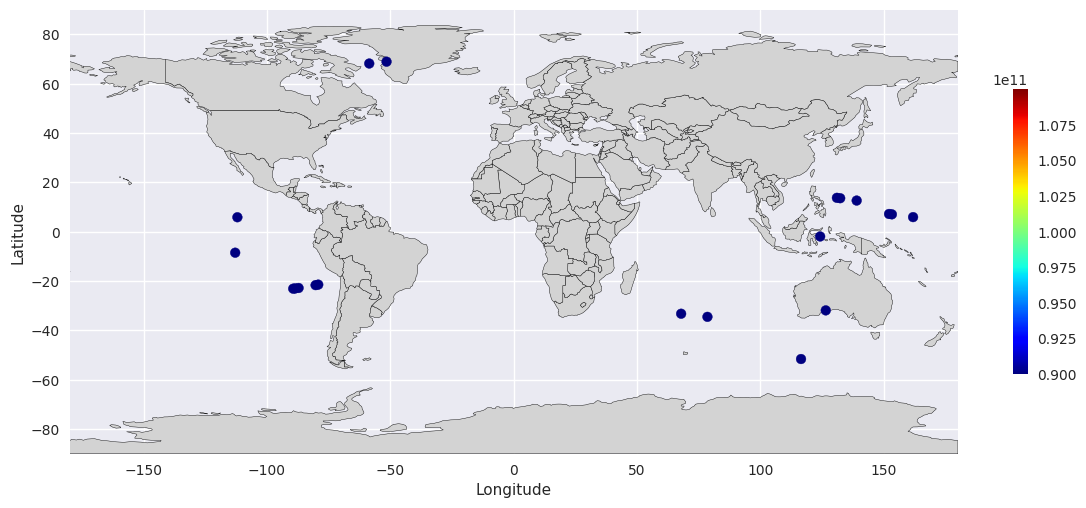

In [34]:
param = 'oma'
tidx = 0
# mask1 = 'iuse == 1'
# mask2 = '(nchan == 13 & iuse == 1)'
mask2 = '((nchan == 13 & iuse == 1) & idqc == 3)'

# df = gdf_list[tidx].obsInfo[varName].query(mask2).loc[varType].oma

# df = df1.query(mask1)

# df1 = gdf_list[tidx].obsInfo[varName].query(mask).loc[varType].idqc

# Range colors: param
# minVal = -120.0000
# maxVal = 20.0000

# minVal = df.min()
# maxVal = df.max()

# Imin = df.idxmin()
# Imax = df.idxmax()

# print('minVal=',minVal,'maxVal=',maxVal)

# print('Imin=',Imin,'Imax=',Imax)

# minVal = None
# maxVal = None

print('param=', param, 'tidx=', tidx)

# help(gd.plot_diag.plot)

# gd.plot_diag.plot(gdf_list[tidx], 
#                   varName=varName, 
#                   varType=varType, 
#                   param=param, 
#                   minVal=minVal, 
#                   maxVal=maxVal, 
#                   mask=mask2, 
#                   legend='true')

gd.plot_diag.plot(gdf_list[tidx], 
                  varName=varName, 
                  varType=varType, 
                  param=param,  
                  mask=mask2, 
                  legend='true')

figname = varName + '_' + param + '_' + 'plot.png'

plt.tight_layout()
plt.savefig(figname)

Para salvar a figura, defina o seu nome (`figname`) e execute os comandos a seguir:

In [16]:
# figname = varName + '_' + param + '_' + 'plot.png'

# plt.tight_layout()
# plt.savefig(figname)

Gerando a mesma figura, mas considerando vários tipos diferentes (`kx`) da observação selecionada:

In [17]:
# varTypes = [254,242,221,220,257,258,281,280]
# idschar = '_'.join([str(item) for item in varTypes])

# gd.plot_diag.ptmap(gdf_list[tidx], varName=varName, varType=varTypes)

# figname = varName + '_' + idschar + '_' + 'ptmap.png'

# plt.tight_layout()
# plt.savefig(figname)

Gerando uma figura com diferentes variáveis, considerando a máscara `iuse==1`:

In [18]:
# varNames = ['uv','ps','t']
# idschar = '_'.join([str(item) for item in varNames])

# gd.plot_diag.pvmap(gdf_list[tidx], varName=varNames, mask='iuse==1')

# figname = idschar + '_pvmap.png'

# plt.tight_layout()
# plt.savefig(figname)

### Histograma

Utilize a função `pcount()` da classe `plot_diag` para obter um histograma com a contagem do número de observações para uma determinada variável:

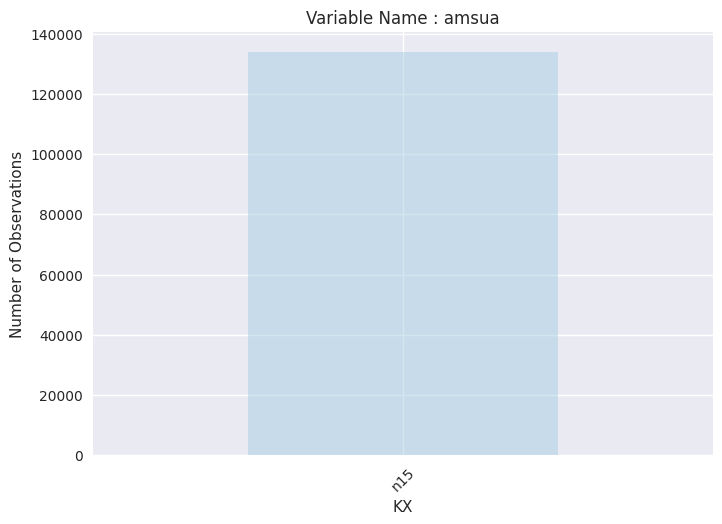

In [35]:
gd.plot_diag.pcount(gdf_list[tidx], varName)

Utilize a função `vcount()` da classe `plot_diag` para obter um histograma com a contagem do número de observações para todos os tipos de variáveis:

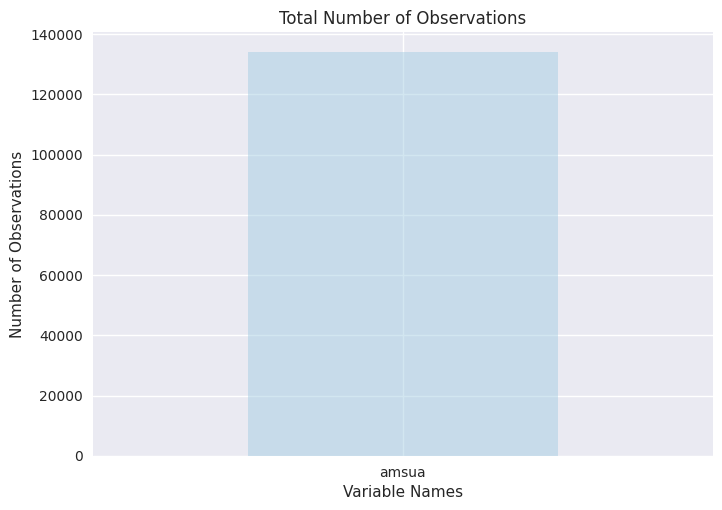

In [20]:
gd.plot_diag.vcount(gdf_list[tidx])

De forma semelhante, utilize a função `kxcount()` da classe `plot_diag` para obter um histograma com a contagem do número de observações por tipo:

In [21]:
# gd.plot_diag.kxcount(gdf_list[tidx])

### Série temporal

<a id='time_series'></a>
A seguir são apresentadas as opções de figuras com a função `time_series()`, incluída na classe `plot_diag`. Inicialmente é gerada uma figura com os parâmetros já fixados nesta seção. Em seguida são apresentadas figuras alterando os parâmetros `Level`, `Lay` e `SingleL`.

Plotando uma série temporal do OmA e OmF:

varName= amsua varType= n15 Level= 1000

 Analyzing data of variable: amsua  ||  type: n15  ||  Radiance data of the AMSU-A sensor from NOAA-15 satellite  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2024-03-26:00  - Level:  1000
 Preparing data for: 2024-03-26:06  - Level:  1000
 Preparing data for: 2024-03-26:12  - Level:  1000
 Preparing data for: 2024-03-26:18  - Level:  1000


 Calculating for 2024-03-26:00
ERROR in time_series function.
 Calculating for 2024-03-26:06
ERROR in time_series function.
 Calculating for 2024-03-26:12
ERROR in time_series function.
 Calculating for 2024-03-26:18
ERROR in time_series function.


 Making Graphics...


/home/radiancia/readDiag-issuefix_27/gsidiag/__main__.py:1207: UserWarning: Warning: converting a masked element to nan.
  mean_limit_inf = np.min(np.array([np.min(mean_final), np.min(mean_finala)]))
/home/radiancia/readDiag-issuefix_27/gsidiag/__main__.py:1208: UserWarning: Warning: converting a masked element to nan.
  mean_limit_sup = np.max(np.array([np.max(mean_final), np.max(mean_finala)]))
/home/radiancia/readDiag-issuefix_27/gsidiag/__main__.py:1210: UserWarning: Warning: converting a masked element to nan.
  std_limit_inf = np.min(np.array([np.min(std_final), np.min(std_finala)]))
/home/radiancia/readDiag-issuefix_27/gsidiag/__main__.py:1211: UserWarning: Warning: converting a masked element to nan.
  std_limit_sup = np.max(np.array([np.max(std_final), np.max(std_finala)]))


UnboundLocalError: local variable 'forplot' referenced before assignment

<Figure size 600x400 with 0 Axes>

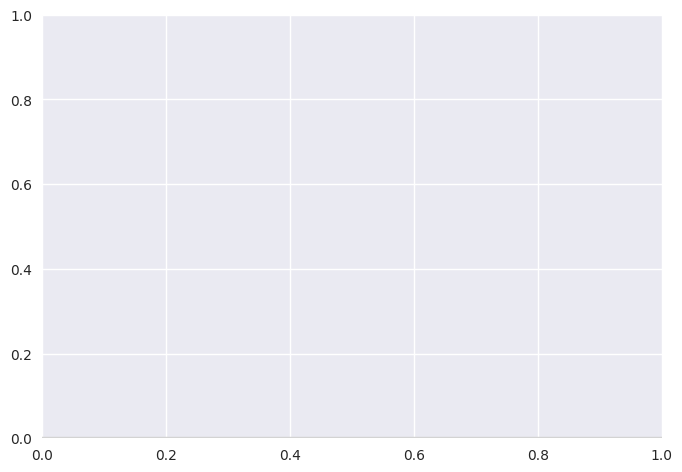

In [22]:
# varName = 'amsua'
# varType = 'n15'
print('varName=',varName,'varType=',varType,'Level=',Level)

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

No caso anterior, o parâmetro `Level` estava fixo em 1000 hPa com `SingleL` igual a `All`, ou seja, toda a atmosfera foi considerada como uma única camada e o valor 1000 hPa funciona apenas como uma flag para indicar que não existe variação em altura. Ainda com `Level=1000`, pode-se usar `SingleL='OneL'` para uma única camada em torno do valor de `Level`, neste caso 1000 hPa, variando entre `Level-Lay` e `Level+Lay` (na definição de variáveis, `Lay` foi fixado com 15 hPa; no caso de ser `None`, o valor padrão de 50 hPa é utilizado).


 Analyzing data of variable: amsua  ||  type: n15  ||  Radiance data of the AMSU-A sensor from NOAA-15 satellite  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2024-01-01:00  - Level:  1000
 Preparing data for: 2024-01-01:06  - Level:  1000
 Preparing data for: 2024-01-01:12  - Level:  1000
 Preparing data for: 2024-01-01:18  - Level:  1000
 Preparing data for: 2024-01-02:00  - Level:  1000
 Preparing data for: 2024-01-02:06  - Level:  1000
 Preparing data for: 2024-01-02:12  - Level:  1000
 Preparing data for: 2024-01-02:18  - Level:  1000


 Calculating for 2024-01-01:00
ERROR in time_series function.
 Calculating for 2024-01-01:06
ERROR in time_series function.
 Calculating for 2024-01-01:12
ERROR in time_series function.
 Calculating for 2024-01-01:18
ERROR in time_series function.
 Calculating for 2024-01-02:00
ERROR in time_series function.
 Calculating for 2024-01-02:06
ERROR in time_series function.
 Calculating for 2

/home/radiancia/readDiag-issuefix_27/gsidiag/__main__.py:1198: UserWarning: Warning: converting a masked element to nan.
  mean_limit_inf = np.min(np.array([np.min(mean_final), np.min(mean_finala)]))
/home/radiancia/readDiag-issuefix_27/gsidiag/__main__.py:1199: UserWarning: Warning: converting a masked element to nan.
  mean_limit_sup = np.max(np.array([np.max(mean_final), np.max(mean_finala)]))
/home/radiancia/readDiag-issuefix_27/gsidiag/__main__.py:1201: UserWarning: Warning: converting a masked element to nan.
  std_limit_inf = np.min(np.array([np.min(std_final), np.min(std_finala)]))
/home/radiancia/readDiag-issuefix_27/gsidiag/__main__.py:1202: UserWarning: Warning: converting a masked element to nan.
  std_limit_sup = np.max(np.array([np.max(std_final), np.max(std_finala)]))


UnboundLocalError: local variable 'forplot' referenced before assignment

<Figure size 600x400 with 0 Axes>

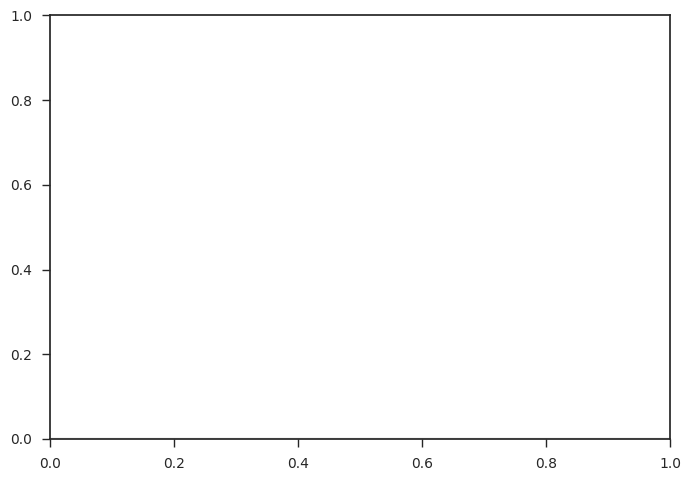

In [25]:
SingleL = 'OneL'
Lay = 15

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

Observe como no exemplo acima a quantidade de dados diminui, uma vez que agora está sendo utilizada uma camada entre 1015 e 985 hPa.

Agora vamos alterar para não fixar em um único nível ou camada, ou seja, altear a variável `Level` para `None` ou `Zlevs`. A opção `None` busca os dados em cada nível existente nos arquivos e faz a figura para todos esses níveis, porém os valores no eixo y (ordenada) são apenas dos níveis padrão. É importante esclarecer que os chamados níveis padrão estão definidos na classe `read_diag` e podem ser acessados utilizando o método `zlevs` da seguinte forma:

In [26]:
gdf_list[tidx].zlevs

[1000.0,
 900.0,
 800.0,
 700.0,
 600.0,
 500.0,
 400.0,
 300.0,
 250.0,
 200.0,
 150.0,
 100.0,
 50.0,
 0.0]

Dessa forma, pode-se utilizar o parâmetro `Level='Zlevs'` para produzir uma série temporal por níveis:

In [27]:
Level = 'Zlevs'
Lay = 15

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)


 Analyzing data of variable: amsua  ||  type: n15  ||  Radiance data of the AMSU-A sensor from NOAA-15 satellite  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2024-01-01:00  - No information on this date 
 Preparing data for: 2024-01-01:06  - No information on this date 
 Preparing data for: 2024-01-01:12  - No information on this date 
 Preparing data for: 2024-01-01:18  - No information on this date 
 Preparing data for: 2024-01-02:00  - No information on this date 
 Preparing data for: 2024-01-02:06  - No information on this date 
 Preparing data for: 2024-01-02:12  - No information on this date 
 Preparing data for: 2024-01-02:18  - No information on this date 


 Calculating for 2024-01-01:00


UnboundLocalError: local variable 'mean_dataByLevs' referenced before assignment

Se `Lay=None`, então as camadas são preenchidas variando entre o valor médio considerando as camadas inferiores e superiores. Por exemplo, para o nível de 700 hPa é construída uma camada entre 750 e 650 hPa, uma vez que os níveis inferiores e superiores são 800 e 600 hPa, respectivamente. Para o nível de 1000 hPa a camada varia entre 1050 e 950 hPa.

O mesmo exemplo anterior, mas considerando `Level='Zlevs'`:

In [28]:
Level = 'Zlevs'
Lay = None

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)


 Analyzing data of variable: amsua  ||  type: n15  ||  Radiance data of the AMSU-A sensor from NOAA-15 satellite  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2024-01-01:00  - No information on this date 
 Preparing data for: 2024-01-01:06  - No information on this date 
 Preparing data for: 2024-01-01:12  - No information on this date 
 Preparing data for: 2024-01-01:18  - No information on this date 
 Preparing data for: 2024-01-02:00  - No information on this date 
 Preparing data for: 2024-01-02:06  - No information on this date 
 Preparing data for: 2024-01-02:12  - No information on this date 
 Preparing data for: 2024-01-02:18  - No information on this date 


 Calculating for 2024-01-01:00


UnboundLocalError: local variable 'mean_dataByLevs' referenced before assignment

Finalmente, existe a opção de se considerar todos os níveis, ou seja, `Level=None`. Esta opção traz certa dificuldade na visualização da informação na figura por conta da grande quantidade de níveis e distribuição dos dados em todos os níveis:

In [29]:
Level = None

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)


 Analyzing data of variable: amsua  ||  type: n15  ||  Radiance data of the AMSU-A sensor from NOAA-15 satellite  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2024-01-01:00  - No information on this date 
 Preparing data for: 2024-01-01:06  - No information on this date 
 Preparing data for: 2024-01-01:12  - No information on this date 
 Preparing data for: 2024-01-01:18  - No information on this date 
 Preparing data for: 2024-01-02:00  - No information on this date 
 Preparing data for: 2024-01-02:06  - No information on this date 
 Preparing data for: 2024-01-02:12  - No information on this date 
 Preparing data for: 2024-01-02:18  - No information on this date 


 Calculating for 2024-01-01:00


UnboundLocalError: local variable 'mean_dataByLevs' referenced before assignment

Finalizado o uso dos arquivos, feche-os para liberar a memória utilizada:

In [23]:
for file in gdf_list:
    file.close()

O `readDiag` é um pacote em desenvolvimento e em constante atualização. Novas funcionalidades serão adicionadas e demonstradas por meio deste notebook.